In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import matplotlib.lines as mline
import welly
import mplcursors

In [4]:
basedir = r"tutorial/"

In [5]:
# Load the data of well 2, well 1 and well 5
well1 = welly.Well.from_las(basedir+"WellX-1.las")
well2 = welly.Well.from_las(basedir+"WellX-2.las")
well5 = welly.Well.from_las(basedir+"WellX-5.las")

In [6]:
# Converting needed curve objects to numpy arrays

# Well 1
well1GR = np.array(well1.data['GR'])
well1TVD = np.array(well1.data['TVD'])

# Well 2

well2GR = np.array(well2.data['GR'])
well2TVD = np.array(well2.data['TVD'])

# Well5

well5GR = np.array(well5.data['GR'])
well5TVD = np.array(well5.data['TVD'])

In [7]:
def adapt(ax, X, Y, sbsline, ymin = None, ymax = None):
    if (ymin is None) and (ymax is None):
        ymin = 9000
        ymax = 13000
        
    val = sbsline
    
    ax.set_xlim(0,150)
    ax.set_ylim(ymin,ymax)
    line = mline.Line2D([val, val], [ymin, ymax], color = 'black')
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    c = "#032b03"
    ax.set_yticks(np.arange(ymin,ymax+1, 100), minor = False)
    ax.set_xticks(np.arange(0,151,150))
    
    ax.fill_betweenx(Y, val, X, where = val > X, interpolate = True, color = '#d6cc0b')
    ax.fill_betweenx(Y, val, X, where = val < X, interpolate = True, color = '#b55a2a')
    
    ax.add_line(line)
    ax.plot(X, Y, color = c)
    
    
def drawCorrelation(xy_A, xy_B, axes_A, axes_B, c, ls = '-'):
    return ConnectionPatch(xyA = xy_A, xyB = xy_B, coordsA="data", coordsB ="data",
                        axesA = axes_A, axesB = axes_B, color = c, lw = 2, ls=ls)

/home/mirzakhan/.local/share/virtualenvs/Stdlog-xUKvEn9n/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in less
/home/mirzakhan/.local/share/virtualenvs/Stdlog-xUKvEn9n/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater


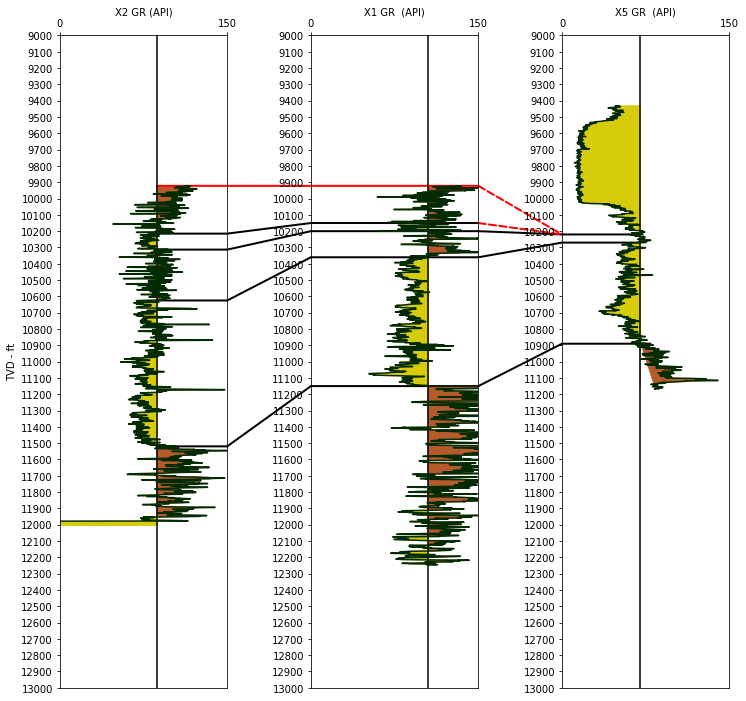

In [15]:
%matplotlib inline
    
fig = plt.figure(figsize=(12,12))

ax1 = fig.add_subplot(131)
ax1.set_xlabel("X2 GR (API)")
ax1.set_ylabel("TVD - ft")
ax2 = fig.add_subplot(132)
ax2.set_xlabel("X1 GR  (API)")
ax3 = fig.add_subplot(133)
ax3.set_xlabel("X5 GR  (API)")

x2points = [(87, 11519.5),(150, 11519.5) ,(87, 10625), (150, 10625), (87, 10313), (150, 10313),
           (87, 10215), (150, 10215), (87,9922),(150,9922)]
x1points = [(0,11150), (150, 11150), (0,10360), (150, 10360), (0, 10200), (150, 10200), (0,10150), (150,10150),
           (0,9922),(150,9922)]
x5points = [(0, 10890), (70, 10890), (0,10270), (70, 10270), (0,10220), (70, 10220)]

adapt(ax1, well2GR, well2TVD, 87)
adapt(ax2, well1GR, well1TVD, 105)
adapt(ax3, well5GR, well5TVD, 70)

con1 = drawCorrelation(x2points[0], x2points[1], ax1, ax1, c = 'black')
con2 = drawCorrelation(x2points[1], x1points[0], ax1, ax2, c = 'black')
con3 = drawCorrelation(x1points[0], x1points[1], ax2, ax2, c = 'black')
con4 = drawCorrelation(x1points[1], x5points[0], ax2, ax3, c = 'black')
con5 = drawCorrelation(x5points[0], x5points[1], ax3, ax3, c = 'black')

con11 = drawCorrelation(x2points[2], x2points[3], ax1, ax1, c = 'black')
con22 = drawCorrelation(x2points[3], x1points[2], ax1, ax2, c = 'black')
con33 = drawCorrelation(x1points[2], x1points[3], ax2, ax2, c = 'black')
con44 = drawCorrelation(x1points[3], x5points[2], ax2, ax3, c = 'black')
con55 = drawCorrelation(x5points[2], x5points[3], ax3, ax3, c = 'black')

con111 = drawCorrelation(x2points[4], x2points[5], ax1, ax1, c = 'black')
con222 = drawCorrelation(x2points[5], x1points[4], ax1, ax2, c = 'black')
con333 = drawCorrelation(x1points[4], x1points[5], ax2, ax2, c = 'black')
con444 = drawCorrelation(x1points[5], x5points[4], ax2, ax3, c = 'black')
con555 = drawCorrelation(x5points[4], x5points[5], ax3, ax3, c = 'black')

con1111 = drawCorrelation(x2points[6], x2points[7], ax1, ax1, c = 'black')
con2222 = drawCorrelation(x2points[7], x1points[6], ax1, ax2, c = 'black')
con3333 = drawCorrelation(x1points[6], x1points[7], ax2, ax2, c = 'black')
con4444 = drawCorrelation(x1points[7], x5points[4], ax2, ax3, c = 'red', ls = '--')


con8 = drawCorrelation(x2points[8], x2points[9], ax1, ax1, c = 'red')
con9 = drawCorrelation(x2points[9], x1points[8], ax1, ax2, c = 'red')
con10 = drawCorrelation(x1points[8], x1points[9], ax2, ax2, c = 'red')
con12 = drawCorrelation(x1points[9], x5points[4], ax2, ax3, c = 'red', ls = '--')

ax1.add_artist(con1)
ax1.add_artist(con2)
ax2.add_artist(con3)
ax2.add_artist(con4)
ax3.add_artist(con5)

ax1.add_artist(con11)
ax1.add_artist(con22)
ax2.add_artist(con33)
ax2.add_artist(con44)
ax3.add_artist(con55)

ax1.add_artist(con111)
ax1.add_artist(con222)
ax2.add_artist(con333)
ax2.add_artist(con444)
ax3.add_artist(con555)

ax1.add_artist(con1111)
ax1.add_artist(con2222)
ax2.add_artist(con3333)
ax2.add_artist(con4444)

ax1.add_artist(con8)
ax1.add_artist(con9)
ax2.add_artist(con10)
ax2.add_artist(con12)

mplcursors.cursor(hover = True)
plt.subplots_adjust(wspace = 0.5)

In [16]:
well3 = welly.Well.from_las(basedir+"WellX-3.las")
well4 = welly.Well.from_las(basedir+"WellX-4.las")
well6 = welly.Well.from_las(basedir+"WellX-6.las")

In [17]:
# Converting needed curve objects to numpy arrays

# Well 3
well3GR = np.array(well3.data['GR'])
well3TVD = np.array(well3.data['TVD'])

# Well 4

well4GR = np.array(well4.data['GR'])
well4TVD = np.array(well4.data['TVD'])

# Well6

well6GR = np.array(well6.data['GR'])
well6TVD = np.array(well6.data['TVD'])

/home/mirzakhan/.local/share/virtualenvs/Stdlog-xUKvEn9n/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in less
/home/mirzakhan/.local/share/virtualenvs/Stdlog-xUKvEn9n/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater


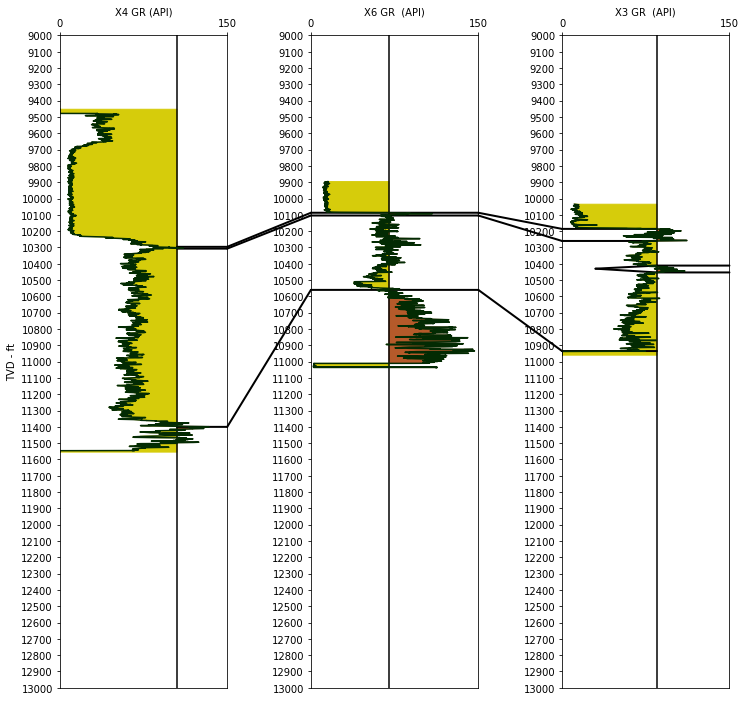

In [19]:
%matplotlib inline
    
fig = plt.figure(figsize=(12,12))

ax4 = fig.add_subplot(131)
ax4.set_xlabel("X4 GR (API)")
ax4.set_ylabel("TVD - ft")
ax6 = fig.add_subplot(132)
ax6.set_xlabel("X6 GR  (API)")
ax3 = fig.add_subplot(133)
ax3.set_xlabel("X3 GR  (API)")

adapt(ax4, well4GR, well4TVD, 105)#, ymin = 9400, ymax = 11600)
adapt(ax6, well6GR, well6TVD, 70)#, ymin = 9400, ymax = 11600)
adapt(ax3, well3GR, well3TVD, 85)#, ymin = 9400, ymax = 11600)

x4points = [(105, 11400), (150, 11400), (105, 10307), (150, 10307), (105,10296), (150,10296)]
x6points = [(0,10560), (150, 10560), (0, 10104), (150, 10104), (0, 10087), (150, 10087)]
x3points = [(0,10935), (85,10935), (0, 10260), (85,10260), (0, 10186), (85,10186), (85, 10411), (150, 10411),
                       (85, 10453), (150, 10453), (30, 10430)]

con1 = drawCorrelation(x4points[0], x4points[1], ax4, ax4, c = 'black')
con2 = drawCorrelation(x4points[1], x6points[0], ax4, ax6, c = 'black')
con3 = drawCorrelation(x6points[0], x6points[1], ax6, ax6, c = 'black')
con4 = drawCorrelation(x6points[1], x3points[0], ax6, ax3, c = 'black')
con5 = drawCorrelation(x3points[0], x3points[1], ax3, ax3, c = 'black')

con11 = drawCorrelation(x4points[2], x4points[3], ax4, ax4, c = 'black')
con22 = drawCorrelation(x4points[3], x6points[2], ax4, ax6, c = 'black')
con33 = drawCorrelation(x6points[2], x6points[3], ax6, ax6, c = 'black')
con44 = drawCorrelation(x6points[3], x3points[2], ax6, ax3, c = 'black')
con55 = drawCorrelation(x3points[2], x3points[3], ax3, ax3, c = 'black')

con111 = drawCorrelation(x4points[4], x4points[5], ax4, ax4, c = 'black')
con222 = drawCorrelation(x4points[5], x6points[4], ax4, ax6, c = 'black')
con333 = drawCorrelation(x6points[4], x6points[5], ax6, ax6, c = 'black')
con444 = drawCorrelation(x6points[5], x3points[4], ax6, ax3, c = 'black')
con555 = drawCorrelation(x3points[4], x3points[5], ax3, ax3, c = 'black')


con7 = drawCorrelation(x3points[6], x3points[7], ax3, ax3, c = 'black')
con8 = drawCorrelation(x3points[8], x3points[9], ax3, ax3, c = 'black')
con9 = drawCorrelation(x3points[6], x3points[10], ax3, ax3, c = 'black')
con10 = drawCorrelation(x3points[8], x3points[10], ax3, ax3, c = 'black')

ax4.add_artist(con1)
ax4.add_artist(con2)
ax6.add_artist(con3)
ax6.add_artist(con4)
ax3.add_artist(con5)

ax4.add_artist(con11)
ax4.add_artist(con22)
ax6.add_artist(con33)
ax6.add_artist(con44)
ax3.add_artist(con55)

ax4.add_artist(con111)
ax4.add_artist(con222)
ax6.add_artist(con333)
ax6.add_artist(con444)
ax3.add_artist(con555)
ax3.add_artist(con7)
ax3.add_artist(con8)
ax3.add_artist(con9)
ax3.add_artist(con10)

mplcursors.cursor(hover = True)
plt.subplots_adjust(wspace = 0.5)